In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_irrelevant_rows(file_name):
    file = open(file_name, "r")
    i = 0
    res = [0,1]
    for line in file.readlines():
        if line[0] == "?":
            res.append(i)
        i += 1
    file.close()
    return res

In [3]:
names = ["rows", "exec_time", "ncond", "nind", "stmt"]

In [4]:
no_rls = pd.read_csv("V0/no_rls_stmts_mod_output.csv", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/no_rls_stmts_mod_output.csv"))
no_rls["nattr"] = no_rls["ncond"]

In [20]:
stage_acta = pd.read_csv("V1/rls_stage_acta_mod_output.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/rls_stage_acta_mod_output.csv"))
stage_acta["nattr"] = stage_acta["ncond"]+2

acta_tenant = pd.read_csv("V2/rls_acta_tenant_mod_output.csv", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/rls_acta_tenant_mod_output.csv"))
acta_tenant["nattr"] = acta_tenant["ncond"]+2

ten_ct_acta_stage = pd.read_csv("V3/rls_tenant_casetype_acta_stages_mod_output.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/rls_tenant_casetype_acta_stages_mod_output.csv"))
ten_ct_acta_stage["nattr"] = ten_ct_acta_stage["ncond"]+4

full_rls = pd.read_csv("V4/full_rls_mod_output.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/full_rls_mod_output.csv"))
full_rls["nattr"] = full_rls["ncond"]+7

In [15]:
def plot_exec_time(df: pd.DataFrame, plot_title: str, log=True, figsize=(13, 8)):
    agg = df.groupby(["nattr", "nind"]).sum().unstack()
#    print("SUMMED DATA")
#    print(agg[["rows", "exec_time"]])
    agg = agg.exec_time/agg.rows
    print("TABLE WITH EXCECUTION TIMES")
    print(agg)
    to_plot = agg.dropna(how="all", axis = 1)

    plt.figure(figsize=figsize)
    if log:
        plt.yscale('log')
    plt.ylabel("Avg. Execution Time per 1 row (ms)")
    plt.xlabel('Number of Filtering Attributes')
    for col in to_plot.columns:
        plt.scatter(to_plot.index, to_plot[col])
        plt.plot(to_plot.index, to_plot[col], label=str(col)+" indx")
    plt.title(plot_title)
    plt.legend()
    


TABLE WITH EXCECUTION TIMES
nind          0         1         2         4
nattr                                        
0      0.895954  1.095668  1.342437  1.331897
1      1.890550  1.508921  9.294220  1.655893
2      1.675832  1.748902  1.414462  1.705162
3      1.340445  1.023093  1.525204  1.009984
4      1.390891  0.617600  1.315074  0.629411
5      4.904050  1.144056  1.317922  1.328078
6           inf       inf       inf       inf
7           inf       inf       NaN       inf


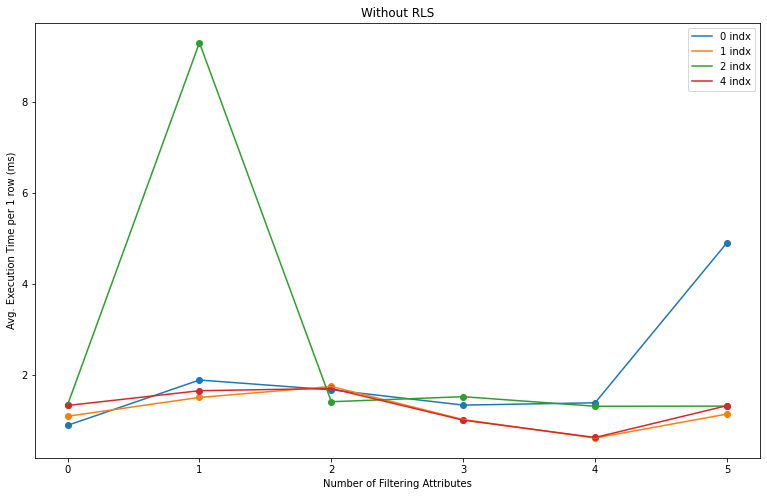

In [7]:
plot_exec_time(no_rls, "Without RLS", log=False)

TABLE WITH EXCECUTION TIMES
nind           0         1         2         3         4
nattr                                                   
2       1.077323  0.558917  0.505176  0.514951  0.554272
3       1.345140  0.489867  0.476706  0.481354  0.487505
4       1.016332  0.568248  0.679706  0.564978  0.563092
5       3.200316  2.264940  2.304820  2.210380  2.177420
6       6.518610  4.614450  4.667700  4.481750  4.533600
7      12.795660  8.816500  8.821400  8.566800  8.488500


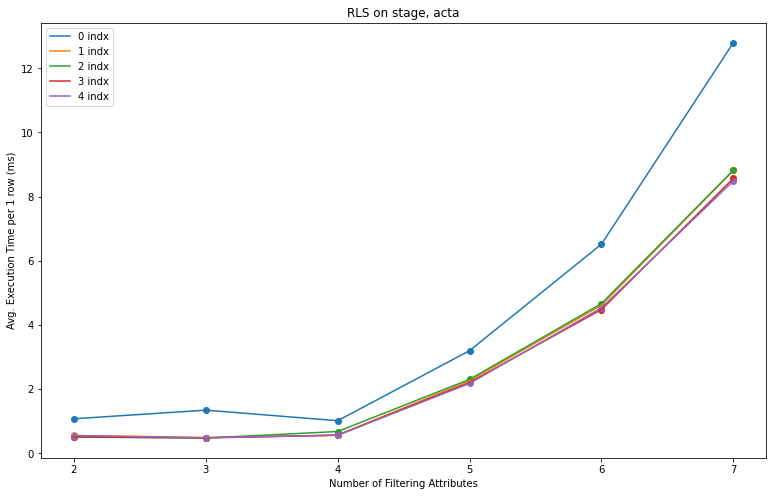

In [16]:
plot_exec_time(stage_acta, "RLS on stage, acta", log=False)

TABLE WITH EXCECUTION TIMES
nind          0         1         3         4
nattr                                        
2      1.046871  0.477436  0.456758  0.505563
3      0.704068  0.481323  0.503468  0.502315
4      1.554263  1.538150  1.124700  0.757272
5      8.972250  1.451400  1.074050  1.399500
6           inf       inf       inf       inf
7           inf       inf       inf       inf


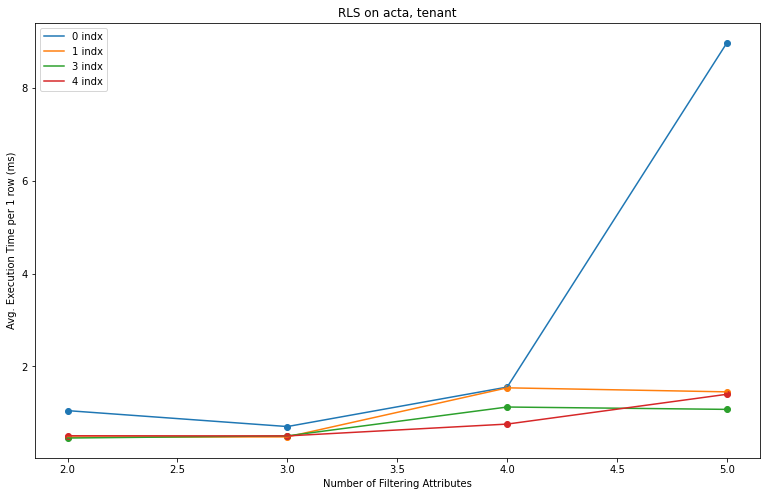

In [22]:
plot_exec_time(acta_tenant, "RLS on acta, tenant", log=False)

TABLE WITH EXCECUTION TIMES
nind          0          1         2          3         4         5         6  \
nattr                                                                           
4      1.261986   1.173809   1.03550   1.200857  0.637614  0.637477  0.544836   
5      9.911600  10.059650  10.15615  11.443450  3.833850  3.548650  2.891700   
6           inf        inf       inf        inf       inf       inf       inf   
7           inf        inf       inf        inf       inf       inf       inf   

nind          7  
nattr            
4      0.543221  
5      2.973500  
6           inf  
7           inf  


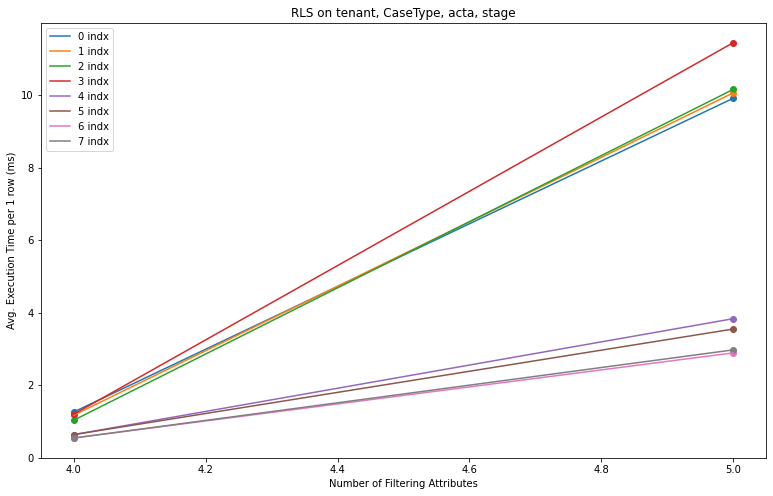

In [23]:
plot_exec_time(ten_ct_acta_stage, "RLS on tenant, CaseType, acta, stage", log=False)

TABLE WITH EXCECUTION TIMES
nind          0         1         2         3         4         5         6  \
nattr                                                                         
7      3.980178  0.973289  0.991622  0.897578  0.909056  1.064978  0.941333   

nind          7  
nattr            
7      0.872033  


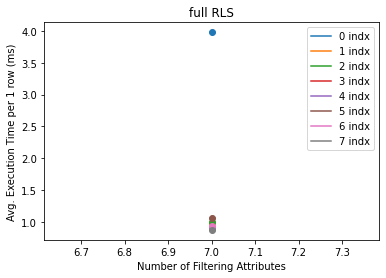

In [19]:
plot_exec_time(full_rls, "full RLS", log=False, figsize=(6, 4))